In [86]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

np.random.seed(13)

### Данные

In [87]:
data = load_digits()

In [88]:
X = data['data']
y = (data['target'] >= 5).astype(np.int32)

In [89]:
DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


<Figure size 432x288 with 0 Axes>

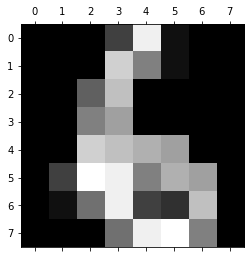

6


In [90]:
plt.gray()
index = np.random.randint(0, len(X) - 19)
plt.matshow(X[index].reshape(8, 8))
plt.show()
print(data.target[index])

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.77,
                                                    shuffle=True)

In [92]:
X_train.shape, X_test.shape

((1383, 64), (414, 64))

In [93]:
m, n = X_train.shape

### Vectornerov


In [94]:
class LinearRegression:
    
    def mse(y_true, y_pred):
        return np.sum(y_true==y_pred)/len(y_pred)
    
    def __init__(self):
        self.w = np.random.randn(n, 1) * 0.001
        self.b = np.random.randn() * 0.001
        self.report_every = 40
        self.losses_train = []
        self.losses_test = []

    def fit(self, X, y, learning_rate=0.005, epochs=40):
        
        for epoch in range(epochs):            
            A = X.reshape(m, n).dot(self.w) + self.b
            
            
            dw = np.sum(X.reshape(m, n) * (A.reshape(m, 1) - y.reshape(m, 1)), axis=0) / len(X)
            db = np.sum((A.reshape(m, 1) - y.reshape(m, 1)), axis=0) / len(X)
            
            # gradient step
            self.w = self.w - learning_rate * dw.reshape(n, 1)
            self.b = self.b - learning_rate * db

    def predict(self,X):
        return np.dot(X,self.w)+self.b

In [95]:
%%time
model = LinearRegression()
model.fit(X_train, y_train, learning_rate=0.001, epochs=500)

CPU times: user 1.01 s, sys: 657 ms, total: 1.67 s
Wall time: 1.07 s


In [96]:
model.w

array([[-2.22351386e-003],
       [-4.20113136e+110],
       [-7.72624765e+111],
       [-1.76306751e+112],
       [-1.76261371e+112],
       [-8.61662829e+111],
       [-1.99946182e+111],
       [-1.92431005e+110],
       [-9.37303154e+108],
       [-2.84877696e+111],
       [-1.55132425e+112],
       [-1.77906087e+112],
       [-1.53523792e+112],
       [-1.24450471e+112],
       [-2.67400402e+111],
       [-1.52753101e+110],
       [-3.20005676e+108],
       [-3.76372747e+111],
       [-1.49483007e+112],
       [-1.04465485e+112],
       [-1.06467655e+112],
       [-1.19791565e+112],
       [-2.59185260e+111],
       [-7.08373091e+109],
       [-1.12820282e+108],
       [-3.61950903e+111],
       [-1.35938488e+112],
       [-1.32500591e+112],
       [-1.49179219e+112],
       [-1.14261621e+112],
       [-3.35623838e+111],
       [-2.02208962e+108],
       [-2.10449698e-003],
       [-3.35675125e+111],
       [-1.14071184e+112],
       [-1.36446984e+112],
       [-1.53861413e+112],
 

In [97]:
model.b

array([-1.47131652e+111])